In [1]:
    tcomp = tic;
    % mphlaunch
    fid = fopen('seo.log','a+');
    clear seo
    seo.ifile = '/home/sbkim/Work/git/openfoam_seo/sbD_H_damper_mass_L.mphbin';
    % seo.ifile = '/home/sbkim/Work/git/openfoam_seo/sbD_H_damper_mass_S.mphbin';
%     seo.ifile = ifile;
    % seo.id_mesh = 1;
    % seo.id_mesh = 5;
    seo.id_mesh = 9;
    seo.n_rep = 2^3;

    seo.messenger_D = 16e-3;

    id_pl = false;

In [11]:
addpath /usr/local/comsol55/multiphysics/mli/
% cd /usr/local/comsol55/multiphysics/mli/startup
% comsolinit
% cd ~/Work/git/openfoam_seo/
mphstart


MATLAB is now connected to a COMSOL Multiphysics Server at localhost:2036

Run the commands below to access the COMSOL ModelUtil commands:
import com.comsol.model.util.*



Total elasped time is 2.4 s.

s_evl =

    '0.162899[m]'


s_evl =

    '0.017500[m]'


s_evl =

    '0.000000[m]'


ans =

    0.3608    0.2979



Unrecognized function or variable 'gcfG'.

Error in sbD_para (line 342)
gcfG;gcfH;gcfLFont;gcfS;gcfP;



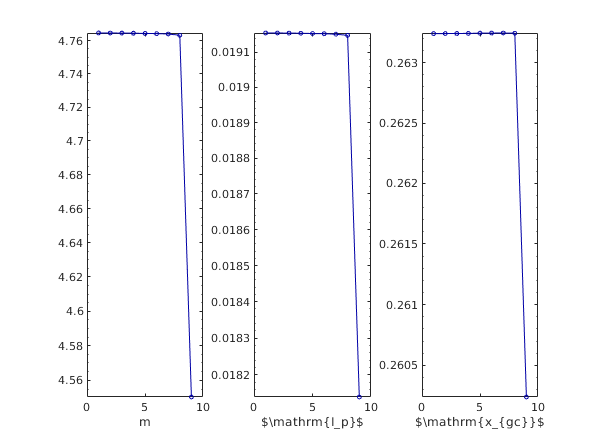

In [14]:
[model,seo] = sbD_para('/home/sbkim/Work/git/openfoam_seo/sbD_H_damper_mass_S.mphbin')

In [ ]:
for ii=1:3
    subplot(1,3,ii)
    plot(seo.res_tr(1:8,ii),'-o','MarkerSize',6-3)
    grid
end

In [12]:
clear model

import com.comsol.model.*
import com.comsol.model.util.*

model = ModelUtil.create('Model');

model.modelPath('/home/sbkim/Work/git/openfoam_seo');

model.component.create('comp1', true);

model.component('comp1').geom.create('geom1', 3);

model.component('comp1').mesh.create('mesh1');

model.component('comp1').geom('geom1').create('imp1', 'Import');
model.component('comp1').geom('geom1').feature('imp1').set('type', 'native');
model.component('comp1').geom('geom1').feature('imp1').set('filename', seo.ifile);
model.component('comp1').geom('geom1').run;

model.component('comp1').material.create('mat1', 'Common');
model.component('comp1').material('mat1').propertyGroup.create('Enu', 'Young''s modulus and Poisson''s ratio');
model.component('comp1').material('mat1').propertyGroup.create('Murnaghan', 'Murnaghan');
model.component('comp1').material('mat1').propertyGroup.create('Lame', ['Lam' native2unicode(hex2dec({'00' 'e9'}), 'unicode') ' parameters']);

model.component('comp1').physics.create('solid', 'SolidMechanics', 'geom1');
model.component('comp1').physics('solid').create('fix1', 'Fixed', 2);
model.component('comp1').physics('solid').feature('fix1').selection.set([1 2 5]);
model.component('comp1').physics('solid').create('gr1', 'Gravity', 3);
model.component('comp1').physics('solid').feature('gr1').selection.set([1]);

model.component('comp1').mesh('mesh1').autoMeshSize(seo.id_mesh);

model.component('comp1').material('mat1').label('Structural steel');
model.component('comp1').material('mat1').set('family', 'custom');
model.component('comp1').material('mat1').set('specular', 'custom');
model.component('comp1').material('mat1').set('customspecular', [0.7843137254901961 0.7843137254901961 0.7843137254901961]);
model.component('comp1').material('mat1').set('diffuse', 'custom');
model.component('comp1').material('mat1').set('customdiffuse', [0.6666666666666666 0.6666666666666666 0.6666666666666666]);
model.component('comp1').material('mat1').set('ambient', 'custom');
model.component('comp1').material('mat1').set('customambient', [0.6666666666666666 0.6666666666666666 0.6666666666666666]);
model.component('comp1').material('mat1').set('noise', true);
model.component('comp1').material('mat1').set('noisefreq', 1);
model.component('comp1').material('mat1').set('lighting', 'cooktorrance');
model.component('comp1').material('mat1').set('fresnel', 0.9);
model.component('comp1').material('mat1').set('roughness', 0.3);
model.component('comp1').material('mat1').propertyGroup('def').set('relpermeability', {'1' '0' '0' '0' '1' '0' '0' '0' '1'});
model.component('comp1').material('mat1').propertyGroup('def').descr('relpermeability_symmetry', '');
model.component('comp1').material('mat1').propertyGroup('def').set('heatcapacity', '475[J/(kg*K)]');
model.component('comp1').material('mat1').propertyGroup('def').descr('heatcapacity_symmetry', '');
model.component('comp1').material('mat1').propertyGroup('def').set('thermalconductivity', {'44.5[W/(m*K)]' '0' '0' '0' '44.5[W/(m*K)]' '0' '0' '0' '44.5[W/(m*K)]'});
model.component('comp1').material('mat1').propertyGroup('def').descr('thermalconductivity_symmetry', '');
model.component('comp1').material('mat1').propertyGroup('def').set('electricconductivity', {'4.032e6[S/m]' '0' '0' '0' '4.032e6[S/m]' '0' '0' '0' '4.032e6[S/m]'});
model.component('comp1').material('mat1').propertyGroup('def').descr('electricconductivity_symmetry', '');
model.component('comp1').material('mat1').propertyGroup('def').set('relpermittivity', {'1' '0' '0' '0' '1' '0' '0' '0' '1'});
model.component('comp1').material('mat1').propertyGroup('def').descr('relpermittivity_symmetry', '');
model.component('comp1').material('mat1').propertyGroup('def').set('thermalexpansioncoefficient', {'12.3e-6[1/K]' '0' '0' '0' '12.3e-6[1/K]' '0' '0' '0' '12.3e-6[1/K]'});
model.component('comp1').material('mat1').propertyGroup('def').descr('thermalexpansioncoefficient_symmetry', '');
model.component('comp1').material('mat1').propertyGroup('def').set('density', '7850[kg/m^3]');
model.component('comp1').material('mat1').propertyGroup('def').descr('density_symmetry', '');
model.component('comp1').material('mat1').propertyGroup('Enu').set('youngsmodulus', '200e9[Pa]');
model.component('comp1').material('mat1').propertyGroup('Enu').descr('youngsmodulus_symmetry', '');
model.component('comp1').material('mat1').propertyGroup('Enu').set('poissonsratio', '0.30');
model.component('comp1').material('mat1').propertyGroup('Enu').descr('poissonsratio_symmetry', '');
model.component('comp1').material('mat1').propertyGroup('Murnaghan').set('l', '-3.0e11[Pa]');
model.component('comp1').material('mat1').propertyGroup('Murnaghan').set('m', '-6.2e11[Pa]');
model.component('comp1').material('mat1').propertyGroup('Murnaghan').set('n', '-7.2e11[Pa]');
model.component('comp1').material('mat1').propertyGroup('Murnaghan').descr('l_symmetry', '');
model.component('comp1').material('mat1').propertyGroup('Murnaghan').descr('m_symmetry', '');
model.component('comp1').material('mat1').propertyGroup('Murnaghan').descr('n_symmetry', '');
model.component('comp1').material('mat1').propertyGroup('Lame').set('lambLame', '1.15e11[Pa]');
model.component('comp1').material('mat1').propertyGroup('Lame').set('muLame', '7.69e10[Pa]');
model.component('comp1').material('mat1').propertyGroup('Lame').descr('lambLame_symmetry', '');
model.component('comp1').material('mat1').propertyGroup('Lame').descr('muLame_symmetry', '');

model.study.create('std1');
model.study('std1').create('time', 'Transient');
model.study('std1').feature('time').set('tlist', 'range(0,0.1,.1)');

% model.study('std1').feature('time').set('notlistsolnum', 1);
% model.study('std1').feature('time').set('notsolnum', '1');
% model.study('std1').feature('time').set('listsolnum', 1);
% model.study('std1').feature('time').set('solnum', '1');

model.sol.create('sol1');
% model.sol('sol1').study('std1');
% model.sol('sol1').attach('std1');

model.sol('sol1').create('st1', 'StudyStep');
model.sol('sol1').create('v1', 'Variables');
model.sol('sol1').create('t1', 'Time');

model.sol('sol1').feature('t1').create('fc1', 'FullyCoupled');
model.sol('sol1').feature('t1').create('d1', 'Direct');
model.sol('sol1').feature('t1').create('i1', 'Iterative');
model.sol('sol1').feature('t1').feature('i1').create('mg1', 'Multigrid');
model.sol('sol1').feature('t1').feature('i1').feature('mg1').feature('pr').create('so1', 'SOR');
model.sol('sol1').feature('t1').feature('i1').feature('mg1').feature('po').create('so1', 'SOR');
model.sol('sol1').feature('t1').feature.remove('fcDef');

model.result.create('pg1', 'PlotGroup3D');
model.result.create('pg2', 'PlotGroup3D');
model.result('pg1').create('surf1', 'Surface');
model.result('pg1').feature('surf1').set('expr', 'solid.mises');
model.result('pg1').feature('surf1').create('def', 'Deform');
model.result('pg2').create('arwv1', 'ArrowVolume');
model.result('pg2').create('surf1', 'Surface');
model.result('pg2').feature('arwv1').create('col', 'Color');
model.result('pg2').feature('arwv1').create('def', 'Deform');
model.result('pg2').feature('arwv1').feature('col').set('expr', 'comp1.solid.gr1.F_V_Mag');
model.result('pg2').feature('surf1').set('expr', '1');
model.result('pg2').feature('surf1').create('def', 'Deform');

model.nodeGroup.create('dset1solidlgrp', 'Results');
model.nodeGroup('dset1solidlgrp').set('type', 'plotgroup');
model.nodeGroup('dset1solidlgrp').placeAfter('plotgroup', 'pg1');

model.sol('sol1').attach('std1');
model.sol('sol1').feature('v1').set('clist', {'range(0,0.1,.1)' '1.0E-4[s]'});
model.sol('sol1').feature('v1').feature('comp1_u').set('scalemethod', 'manual');
model.sol('sol1').feature('v1').feature('comp1_u').set('scaleval', '1e-2*0.30490567607793895');

model.sol('sol1').feature('t1').set('tlist', 'range(0,0.1,.1)');
model.sol('sol1').feature('t1').set('timemethod', 'genalpha');
model.sol('sol1').feature('t1').feature('aDef').set('cachepattern', true);

model.sol('sol1').feature('t1').feature('fc1').set('linsolver', 'd1');
model.sol('sol1').feature('t1').feature('d1').label('Suggested Direct Solver (solid)');
model.sol('sol1').feature('t1').feature('i1').label('Suggested Iterative Solver (solid)');
model.sol('sol1').feature('t1').feature('i1').feature('mg1').feature('pr').feature('so1').set('relax', 0.8);
model.sol('sol1').feature('t1').feature('i1').feature('mg1').feature('po').feature('so1').set('relax', 0.8);



%
%%  Run
%
% mphsave(model, 'imsi')

if 0
    % res_run = [];
    res_run = zeros(2,seo.n_rep);
    id_test_p = repmat([0 1], 1,seo.n_rep);
    for id_test = 1:length(id_test_p)
        telap = toc(tcomp);

        if id_test
            model.sol('sol1').runAll;
        else
            model.sol('sol1').runFromTo('st1', 'v1');
        end

        telap = toc(tcomp) - telap;
        fprintf(1,'\nTotal elasped time is %.1f s.\n',telap)
        fprintf(fid,'\nTotal elasped time is %.1f s.\n',telap);
        res_run(id_test) = telap;
    end
    seo.res_run = res_run;
    clear res_run id_test_p id_test
    % mphsave(model, 'imsi1')

    figure(100) % for tracing
    clf
    plot(seo.res_run.')
else
    telap = toc(tcomp);
    % if 1
    if 0
        model.sol('sol1').runAll;
    else
        model.sol('sol1').runFromTo('st1', 'v1');
    end
    telap = toc(tcomp) - telap;
    fprintf(1,'\nTotal elasped time is %.1f s.\n',telap)
    fprintf(fid,'\nTotal elasped time is %.1f s.\n',telap);
end

%
%%  Modification
%
seo.xc(1,1) = mphmax(model,'X','volume','selection','all');
seo.xc(2,1) = mphmax(model,'Y','volume','selection','all');
seo.xc(3,1) = mphmax(model,'Z','volume','selection','all');

seo.xc(1,2) = mphmin(model,'X','volume','selection','all');
seo.xc(2,2) = mphmin(model,'Y','volume','selection','all');
seo.xc(3,2) = mphmin(model,'Z','volume','selection','all');

s_evl = sprintf('%f[m]',min(seo.xc(1,:)))
model.param.set('xc', s_evl);
s_evl = sprintf('%f[m]',mean(seo.xc(2,:)))
model.param.set('yc', s_evl);
s_evl = sprintf('%f[m]',mean(seo.xc(3,:)))
model.param.set('zc', s_evl);

if id_pl
    figure(1)
    clf
    mphgeom(model,'geom1','facealpha',.55);
    grid
end

model.component('comp1').selection.create('cyl1', 'Cylinder');
model.component('comp1').selection('cyl1').set('pos', mean(seo.xc'));
model.component('comp1').selection('cyl1').set('axistype', 'x');
model.component('comp1').selection('cyl1').set('r', '18e-3[m]/1');
% model.component('comp1').selection('cyl1').set('condition', 'allvertices');
model.component('comp1').selection('cyl1').set('condition', 'intersects');
% model.component('comp1').selection('cyl1').set('entitydim', 0);

% model.component('comp1').selection('cyl1').set('entitydim', 1);
% seo.xc_s(1,1) = mphmax(model,'X','line','selection','cyl1');
% seo.xc_s(1,2) = mphmin(model,'X','line','selection','cyl1');
% seo.xc_s
% if id_pl
%     mphgeom(model,'geom1','entity','edge','selection','cyl1','facealpha',.15);
% end
model.component('comp1').selection('cyl1').set('r', '20e-3[m]/1');
model.component('comp1').selection('cyl1').set('entitydim', 2);
seo.xc_s(1,1) = mphmax(model,'X','surface','selection','cyl1');
seo.xc_s(1,2) = mphmin(model,'X','surface','selection','cyl1');
seo.xc_s
% if id_pl
%     mphgeom(model,'geom1','entity','boundary','selection','cyl1','facealpha',.15);
%     mphgeom(model,'geom1','entity','boundary','selection','cyl1','facealpha',.35,'facecolor',[.75 .55 .65]);
% end

% model.component('comp1').selection('cyl1').set('entitydim', 3);
% seo.xc_s(1,1) = mphmax(model,'X','volume','selection','cyl1');
% seo.xc_s(1,2) = mphmin(model,'X','volume','selection','cyl1');
% seo.xc_s
% if id_pl
%     mphgeom(model,'geom1','entity','domain','selection','cyl1','facealpha',.35,'facecolor',[.75 .55 .65]);
% end

model.component('comp1').geom('geom1').create('mov1', 'Move');
model.component('comp1').geom('geom1').feature('mov1').selection('input').set({'imp1'});
model.component('comp1').geom('geom1').feature('mov1').set('disply', '-yc');
model.component('comp1').geom('geom1').feature('mov1').set('displz', '-zc');
model.component('comp1').geom('geom1').run('mov1');

model.component('comp1').geom('geom1').create('cyl1', 'Cylinder');
model.component('comp1').geom('geom1').feature('cyl1').set('r', seo.messenger_D);
model.component('comp1').geom('geom1').feature('cyl1').set('h', seo.xc_s(1,1) - seo.xc_s(1,2));
model.component('comp1').geom('geom1').feature('cyl1').set('pos', [seo.xc_s(1,2) 0 0]);
model.component('comp1').geom('geom1').feature('cyl1').set('axistype', 'x');
model.component('comp1').geom('geom1').run('cyl1');

if id_pl
    mphgeom(model,'geom1','facealpha',.55,'facecolor',[0.75 .25 .55]);
end


%
%   POST
%
% close all

model.result.numerical.create('int1', 'IntVolume');
model.result.numerical('int1').selection.all;
% model.result.numerical('int1').set('probetag', 'none');

model.result.numerical('int1').setIndex('expr', 'solid.rho', 0);
model.result.table.create('tbl1', 'Table');
model.result.table('tbl1').comments('Volume Integration 1');
model.result.numerical('int1').set('table', 'tbl1');
model.result.numerical('int1').setResult;

seo.x(1) = mphmax(model,'X','volume','selection','all');
seo.x(2) = mphmin(model,'X','volume','selection','all');

seo.mass_L = mphint2(model,'solid.rho','volume','selection','all');
seo.mx_L(1) = mphint2(model,'solid.rho*X','volume','selection','all');
seo.x_cg = seo.mx_L(1)/seo.mass_L;
s_evl = sprintf('solid.rho*(X-%f)',seo.x_cg);
seo.mx_L(2) = mphint2(model,s_evl,'volume','selection','all');
s_evl = sprintf('solid.rho*(X-%f)^2',seo.x_cg);
seo.Imx_L = mphint2(model,s_evl,'volume','selection','all');

fprintf(fid, 'Mass Large\n mass: %f\n', seo.mass_L);
fprintf(fid, 'mass moment of inertia: %f\n', seo.Imx_L);


Total elasped time is 2.8 s.

s_evl =

    '-0.408014[m]'


s_evl =

    '0.017500[m]'


s_evl =

    '-0.000000[m]'


ans =

   -0.3330   -0.4080



In [13]:
% res_tr = [];
res_tr = zeros(9,3);
res_tr(9,:) = [seo.mass_L,seo.Imx_L,seo.x_cg];
for id_itr = 8:-1:1
    seo.id_mesh = id_itr;
    model.component('comp1').mesh('mesh1').autoMeshSize(seo.id_mesh);
    model.sol('sol1').runFromTo('st1', 'v1');

    seo.mass_L = mphint2(model,'solid.rho','volume','selection','all');
    seo.mx_L(1) = mphint2(model,'solid.rho*X','volume','selection','all');
    seo.x_cg = seo.mx_L(1)/seo.mass_L;
    s_evl = sprintf('solid.rho*(X-%f)',seo.x_cg);
    seo.mx_L(2) = mphint2(model,s_evl,'volume','selection','all');
    s_evl = sprintf('solid.rho*(X-%f)^2',seo.x_cg);
    seo.Imx_L = mphint2(model,s_evl,'volume','selection','all');

    fprintf(fid, 'Mass Large\n mass: %f\n', seo.mass_L);
    fprintf(fid, 'mass moment of inertia: %f\n', seo.Imx_L);

    res_tr(id_itr,:) = [seo.mass_L,seo.Imx_L,seo.x_cg];
end
figure(100)
clf
s_l = {'m','$\mathrm{I_p}$','$\mathrm{x_{gc}}$'};
for ii=1:3
subplot(1,3,ii)
plot(res_tr(:,ii),'-o','Color',[0 0 .65],'MarkerSize',6-3)
xlabel(s_l{ii})
% grid
set(gca,'YScale','log')
end
gcfG;gcfH;gcfLFont;gcfS;gcfP;
gcfX([0 8])

Java exception occurred: 
Exception:
	com.comsol.util.exceptions.FlException: The following feature has encountered a problem
Messages:
	The following feature has encountered a problem:
	- Feature: Compile Equations (sol1/st1)

	Error in multiphysics compilation.

	A problem occurred when building mesh feature 'Free Tetrahedral 1'.

	Failed to generate mesh for domain.
	- Domain: 2

	Intersecting face elements.
	- Face: 3-5
	- x-coordinate: -0.408014
	- y-coordinate: 0.0134918
	- z-coordinate: -3.4584e-05

Stack trace:
	at Mesh.native(dom3meshinit.cpp:2330)
	at Mesh.native(mesh3init.cpp:2012)
	at com.comsol.model.method.MeshSequenceMethod.run(SourceFile:1928)
	at com.comsol.model.method.MeshSequenceMethod.run(SourceFile:1558)
	at com.comsol.model.method.MeshSequenceMethod.runAuto(SourceFile:1272)
	at com.comsol.model.dbmodel.MeshSequenceDb.runAuto(SourceFile:579)
	at com.comsol.model.method.XMeshNativeMethod.meshextend(SourceFile:157)
	at com.comsol.model.method.ModelMethod.meshextend(

Error using subplot (line 332)
Index exceeds number of subplots.



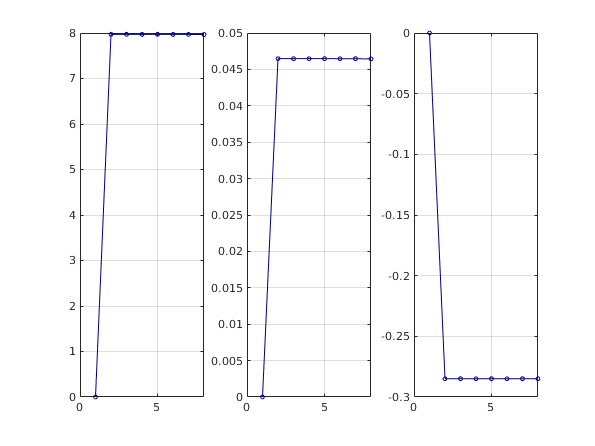

In [20]:
for ii=1:8
    subplot(1,3,ii)
    plot(res_tr(1:8,ii),'-o','MarkerSize',6-3,'Color',[0 0 .5])
    grid
end

# FINE